# **Introduction**

**Welcome to 2912. The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars. The dataset is taken from the Kaggle and can be found in the following link:**
 
https://www.kaggle.com/competitions/spaceship-titanic/overview

**The goal of this project is to examine the data of Spaceship Titanic passengers and determine whether a particular passenger will be sent into cryosleep based on their individual records. In this project, a prediction model will be created and its performance will be assessed using a variety of machine learning algorithms. The information utilized in this project was taken from a Kaggle competition and includes, among other things, details on age, the planet from where it came, cabin number, and how much was spent on the Spaceship Titanic's opulent amenities. The goal of the project is to identify the important features and undertand the relationship between them.** 

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
import warnings
warnings.filterwarnings("ignore")

# **Loading Dataset**

In [136]:
# Load the raw training data
df_raw_train = pd.read_csv('train.csv',
                           header=0)
# Make a copy of df_raw_train
df_train = df_raw_train.copy(deep=True)

# Load the raw test data
df_raw_test = pd.read_csv('test.csv',
                          header=0)
# Make a copy of df_raw_test
df_test = df_raw_test.copy(deep=True)

# Get the name of the target
target = 'Transported'

# sample submission
df_sub = pd.read_csv("sample_submission.csv")

In [137]:
df_test['Transported'] = df_sub['Transported']

In [138]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [139]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False


In [140]:
df_train.shape

(8693, 14)

In [141]:
df_test.shape

(4277, 14)

There are total of 14 columns and 12,000 rows approximately.


* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
* Destination - The planet the passenger will be debarking to.
* Age - The age of the passenger.
* VIP - Whether the passenger has paid for special VIP service during the voyage.
* RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
* Name - The first and last names of the passenger.
* Transported - Whether the passenger was transported to another dimension. 





# **Data Cleaning**

Errors, inaccuracies, and inconsistencies in data are found and corrected (or removed) through the process of data cleaning, sometimes referred to as data cleansing or data scrubbing. Before using the data for analysis, modeling, or reporting, this is an essential stage in the data preparation process. Data cleaning is to enhance the data's quality, lessen data inaccuracies, and make sure the data is prepared for additional analysis. Dealing with missing or duplicate data, fixing mismatched data formats, addressing outliers, and deleting unneeded or irrelevant data are all common data cleaning approaches.

We can see that Cabin column has is in the format of Deck/Num/Side. So, lets split the Cabin column in to Deck, Num and Side in the dataset and drop the cabin column. 

In [142]:
df_train['Deck'] = df_train['Cabin'].str.split('/').str[0]
df_train['Num'] = df_train['Cabin'].str.split('/').str[1]
df_train['Side'] = df_train['Cabin'].str.split('/').str[2]

df_train.drop('Cabin', axis=1, inplace=True)

In [143]:
 # Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,8693,16


In [144]:
df_test['Deck'] = df_test['Cabin'].str.split('/').str[0]
df_test['Num'] = df_test['Cabin'].str.split('/').str[1]
df_test['Side'] = df_test['Cabin'].str.split('/').str[2]

df_test.drop('Cabin', axis=1, inplace=True)

In [145]:
 # Print the dimension of df_train
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,4277,16


In [146]:
# Print the first 5 rows of df_train
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [147]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False,F,5,S


Checking missing values 

In [148]:
# check for missing values in each column
print(df_train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
Deck            199
Num             199
Side            199
dtype: int64


In [149]:
# check for missing values in each column
print(df_test.isnull().sum())

PassengerId       0
HomePlanet       87
CryoSleep        93
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
Transported       0
Deck            100
Num             100
Side            100
dtype: int64


Since there missing values in almost all columns in the dataset, we can drop the rows that contains null values in the Name column as it is irrelevant. 
The mode of HomePlanet, Cryosleep, Destination, VIP, Deck, Num and Side columns are used to replace the null values in the dataset. 
Similarly the median of Age, Roomservice, Foodcourt, shopping mall, spa and VRDeck are used to replace the null values in the dataset. 

In [150]:
df_train.dropna(subset=['Name'], inplace=True)


# fill missing values in the HomePlanet column with the most common value
df_train['HomePlanet'].fillna(df_train['HomePlanet'].mode()[0], inplace=True)

# fill missing values in the CryoSleep column with the most common value
df_train['CryoSleep'].fillna(df_train['CryoSleep'].mode()[0], inplace=True)

# fill missing values in the Destination column with the most common value
df_train['Destination'].fillna(df_train['Destination'].mode()[0], inplace=True)

# fill missing values in the Age column with the median age
df_train['Age'].fillna(df_train['Age'].median(), inplace=True)

# fill missing values in the VIP column with the most common value
df_train['VIP'].fillna(df_train['VIP'].mode()[0], inplace=True)

# fill missing values in the RoomService, FoodCourt, ShoppingMall, and Spa columns with the median value
df_train['RoomService'].fillna(df_train['RoomService'].median(), inplace=True)
df_train['FoodCourt'].fillna(df_train['FoodCourt'].median(), inplace=True)
df_train['ShoppingMall'].fillna(df_train['ShoppingMall'].median(), inplace=True)
df_train['Spa'].fillna(df_train['Spa'].median(), inplace=True)

# fill missing values in the VRDeck column with the median value
df_train['VRDeck'].fillna(df_train['VRDeck'].median(), inplace=True)

# fill missing values in the Deck, Num, and Side columns with the most common value
df_train['Deck'].fillna(df_train['Deck'].mode()[0], inplace=True)
df_train['Num'].fillna(df_train['Num'].mode()[0], inplace=True)
df_train['Side'].fillna(df_train['Side'].mode()[0], inplace=True)


In [151]:
# check for missing values in each column
print(df_train.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64


In [152]:
df_train.shape

(8493, 16)

In [153]:
df_test.dropna(subset=['Name'], inplace=True)


# fill missing values in the HomePlanet column with the most common value
df_test['HomePlanet'].fillna(df_test['HomePlanet'].mode()[0], inplace=True)

# fill missing values in the CryoSleep column with the most common value
df_test['CryoSleep'].fillna(df_test['CryoSleep'].mode()[0], inplace=True)

# fill missing values in the Destination column with the most common value
df_test['Destination'].fillna(df_test['Destination'].mode()[0], inplace=True)

# fill missing values in the Age column with the median age
df_test['Age'].fillna(df_test['Age'].median(), inplace=True)

# fill missing values in the VIP column with the most common value
df_test['VIP'].fillna(df_test['VIP'].mode()[0], inplace=True)

# fill missing values in the RoomService, FoodCourt, ShoppingMall, and Spa columns with the median value
df_test['RoomService'].fillna(df_test['RoomService'].median(), inplace=True)
df_test['FoodCourt'].fillna(df_test['FoodCourt'].median(), inplace=True)
df_test['ShoppingMall'].fillna(df_test['ShoppingMall'].median(), inplace=True)
df_test['Spa'].fillna(df_test['Spa'].median(), inplace=True)

# fill missing values in the VRDeck column with the median value
df_test['VRDeck'].fillna(df_test['VRDeck'].median(), inplace=True)

# fill missing values in the Deck, Num, and Side columns with the most common value
df_test['Deck'].fillna(df_test['Deck'].mode()[0], inplace=True)
df_test['Num'].fillna(df_test['Num'].mode()[0], inplace=True)
df_test['Side'].fillna(df_test['Side'].mode()[0], inplace=True)


In [181]:
df_test['Num'].fillna(df_test['Num'].mode()[0], inplace=True)

In [154]:
# check for missing values in each column
print(df_test.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64


In [155]:
df_test.shape

(4183, 16)

In [156]:
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,False,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,False,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,False,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,False,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,False,F,5,S


# **Data Preprocessing**

The process of data science includes a crucial stage called data preparation. It describes the processes involved in translating raw data into a format suitable for analysis. Making the data more readable and improving the caliber of the analysis's findings are the two main objectives of data preparation. Handling missing values, getting rid of duplicates, dealing with outliers, transforming variables, and scaling variables are all phases in the preparation of data. Data scientists can make the data more meaningful for analysis by removing extraneous information, reducing noise in the data, and more.

Since the target variable Transported has True and False values, we have to encode the values in to 0's and 1's using LabelEncoder from the sklearn.preprocessing library.

In [157]:
## encoding transported col 
from sklearn.preprocessing import LabelEncoder

# create an instance of the LabelEncoder class
encoder = LabelEncoder()

# fit the encoder to the target column
encoder.fit(df_train['Transported'])

# transform the target column to integer values
df_train['Transported'] = encoder.transform(df_train['Transported'])

# fit the encoder to the target column
encoder.fit(df_test['Transported'])

# transform the target column to integer values
df_test['Transported'] = encoder.transform(df_test['Transported'])

In [158]:
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,F,1,S


In [160]:
print(df_test.isnull().sum())

PassengerId     0
HomePlanet      0
CryoSleep       0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
Deck            0
Num             0
Side            0
dtype: int64


Since the Name of the dataset is in object type, we have converted it to string. 

In [161]:
# convert the column to type str
df_train['Name'] = df_train['Name'].astype(str)

# **Data Visualization**

Data visualization is the graphical representation of data. It helps to understand the data better and also provides insights into the data. It is a way to communicate the data to others effectively. The main goal of data visualization is to make the data easy to understand and present it in a way that people can understand quickly and make decisions based on the insights from the data. Data visualization can be in the form of charts, graphs, plots, histograms, maps, and other visual elements. It is an important step in data analysis and helps to identify trends, patterns, and outliers in the data. 

Using the data visualization we are trying to solve the following questions:
	
  1.	 Can we find the relationship between age and the likelihood of being transported to an alternate dimension?
	
  3.	Does the origin planet of a passenger affect their likelihood of being transported to an alternate dimension?
	
  4.	Can we predict if a passenger will be put into cryosleep based on their personal records?
	
  5.	Does the amount spent at the luxury amenities of the Spaceship Titanic affect the likelihood of being transported to an alternate dimension?

  1.	 Can we find the relationship between age and the likelihood of being transported to an alternate dimension?

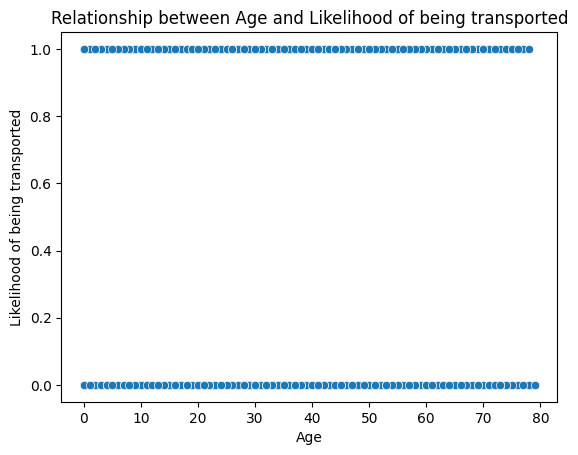

In [162]:
# Create the scatter plot
sns.scatterplot(x="Age", y="Transported", data=df_train)

# Add the title and labels to the x and y axes
plt.title("Relationship between Age and Likelihood of being transported")
plt.xlabel("Age")
plt.ylabel("Likelihood of being transported")

# Show the plot
plt.show()

From the above visualization, we can conclude that there is not enough relationship between age and getting transported to alternate dimension. There might be other factors which will affect the transported variable.

2. Does the origin planet of a passenger affect their likelihood of being transported to an alternate dimension?

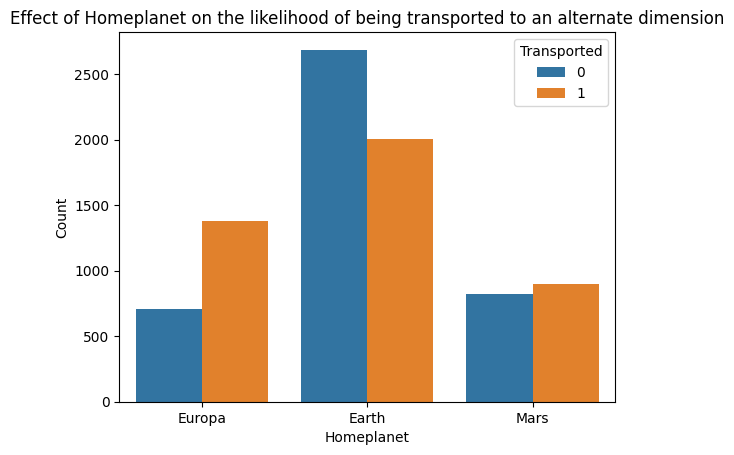

In [163]:

# Create a bar plot of the "Transported" column based on the "Homeplanet" column
sns.countplot(x='HomePlanet', hue='Transported', data=df_train)
# Add a title and labels to the x and y axes
plt.title("Effect of Homeplanet on the likelihood of being transported to an alternate dimension")
plt.xlabel("Homeplanet")
plt.ylabel("Count")

# Show the plot
plt.show()

We can see that from the first planet, the number of people who are transported is lesser than the number of people who doesn't get transported.
It's the opposite in planet 1 and planet 2. But, even then, the number of people transported is lesser than that of planet 0.

3. Does the amount spent at the luxury amenities of the Spaceship Titanic affect the likelihood of being transported to an alternate dimension?

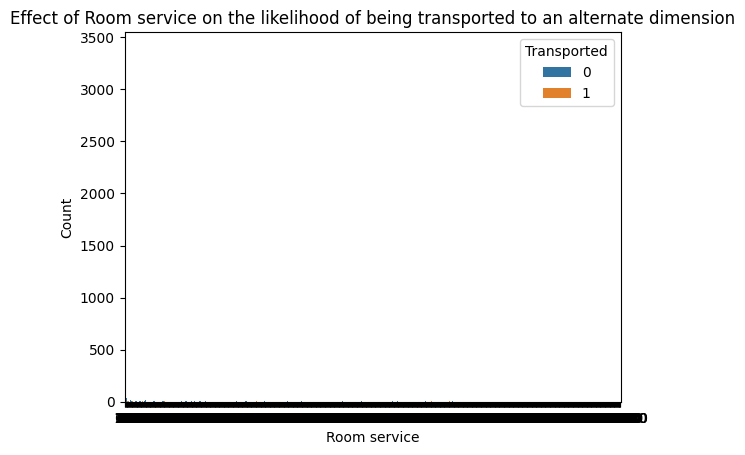

In [164]:
# Create a bar plot of the "Transported" column based on the "Room service" column
sns.countplot(x='ShoppingMall', hue='Transported', data=df_train)

# Add a title and labels to the x and y axes
plt.title("Effect of Room service on the likelihood of being transported to an alternate dimension")
plt.xlabel("Room service")
plt.ylabel("Count")

# Show the plot
plt.show()

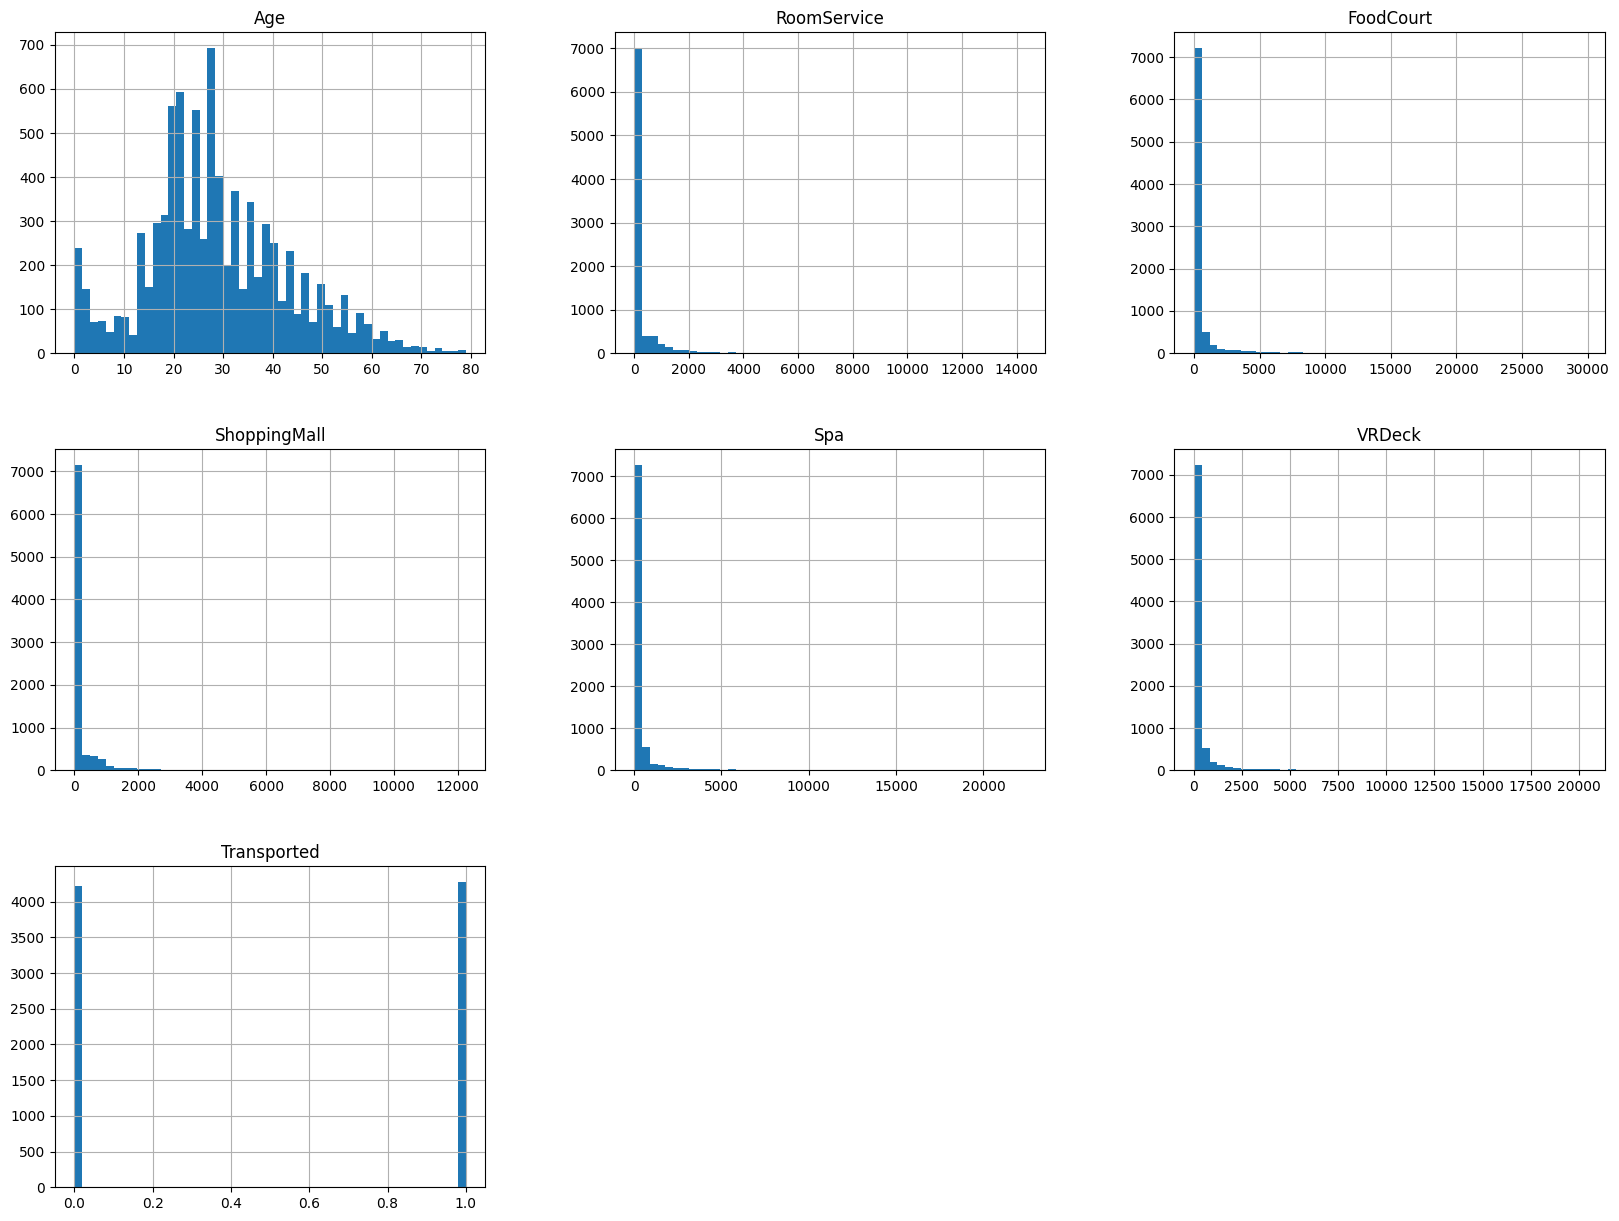

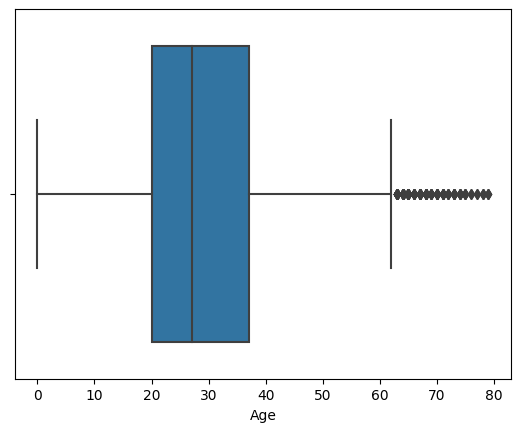

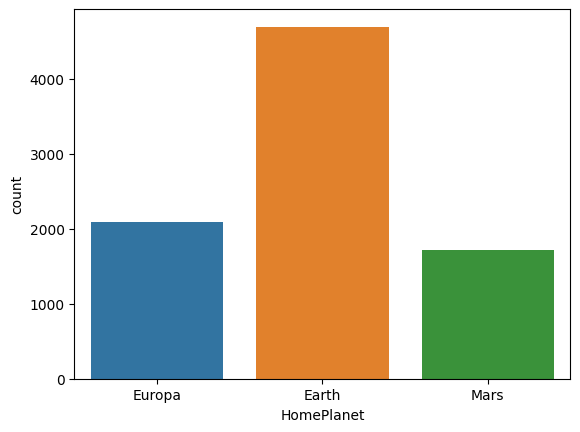

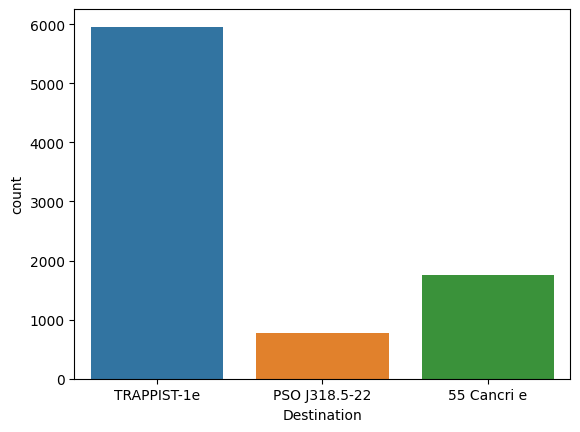

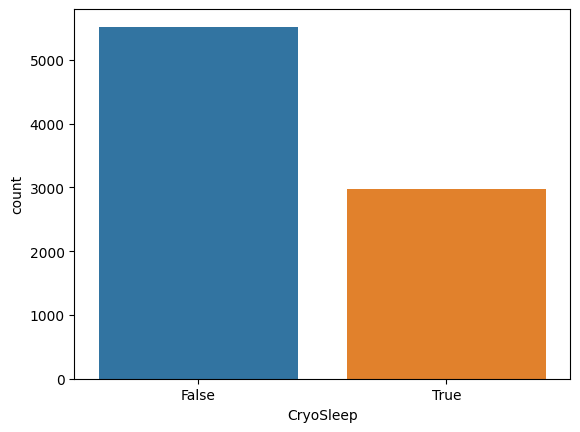

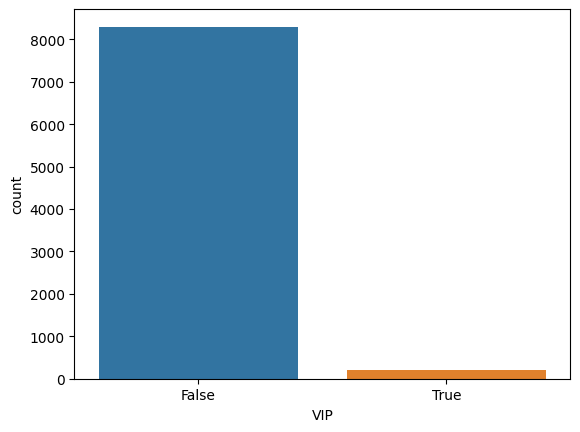

"\n# plot a scatter plot to visualize the relationship between Age and RoomService\nsns.scatterplot(x='Age', y='RoomService', data=df_train)\nplt.show()\n\n# plot a scatter plot to visualize the relationship between Age and FoodCourt\nsns.scatterplot(x='Age', y='FoodCourt', data=df_train)\nplt.show()\n\n# plot a scatter plot to visualize the relationship between Age and ShoppingMall\nsns.scatterplot(x='Age', y='ShoppingMall', data=df_train)\nplt.show()\n\n# plot a scatter plot to visualize the relationship between Age and Spa\nsns.scatterplot(x='Age', y='Spa', data=df_train)\nplt.show()\n\n# plot a scatter plot to visualize the relationship between Age and VRDeck\nsns.scatterplot(x='Age', y='VRDeck', data=df_train)\nplt.show()\n"

In [165]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# plot histograms for the numerical columns
df_train.hist(bins=50, figsize=(20,15))
plt.show()

# plot a box plot to visualize the distribution of the Age column
sns.boxplot(x='Age', data=df_train)
plt.show()

# plot a bar plot to visualize the number of passengers by HomePlanet
sns.countplot(x='HomePlanet', data=df_train)
plt.show()

# plot a bar plot to visualize the number of passengers by Destination
sns.countplot(x='Destination', data=df_train)
plt.show()
## count chey
# plot a bar plot to visualize the number of passengers by CryoSleep status
sns.countplot(x='CryoSleep', data=df_train)
plt.show()
## count chey
# plot a bar plot to visualize the number of passengers by VIP status
sns.countplot(x='VIP', data=df_train)
plt.show()


'''
# plot a scatter plot to visualize the relationship between Age and RoomService
sns.scatterplot(x='Age', y='RoomService', data=df_train)
plt.show()

# plot a scatter plot to visualize the relationship between Age and FoodCourt
sns.scatterplot(x='Age', y='FoodCourt', data=df_train)
plt.show()

# plot a scatter plot to visualize the relationship between Age and ShoppingMall
sns.scatterplot(x='Age', y='ShoppingMall', data=df_train)
plt.show()

# plot a scatter plot to visualize the relationship between Age and Spa
sns.scatterplot(x='Age', y='Spa', data=df_train)
plt.show()

# plot a scatter plot to visualize the relationship between Age and VRDeck
sns.scatterplot(x='Age', y='VRDeck', data=df_train)
plt.show()
'''


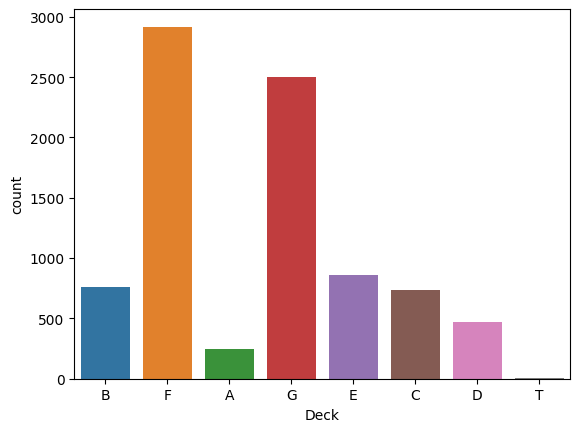

In [166]:
# plot a bar plot to visualize the number of passengers in each deck
sns.countplot(x='Deck', data=df_train)
plt.show()


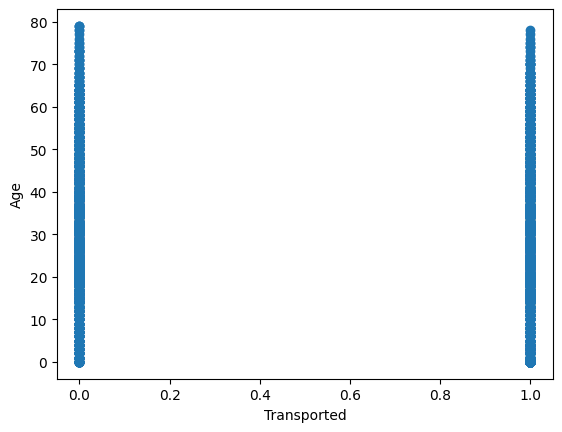

In [167]:

# create a scatter plot
plt.scatter(df_train['Transported'], df_train['Age'])

# add labels
plt.xlabel('Transported')
plt.ylabel('Age')

# show the plot
plt.show()


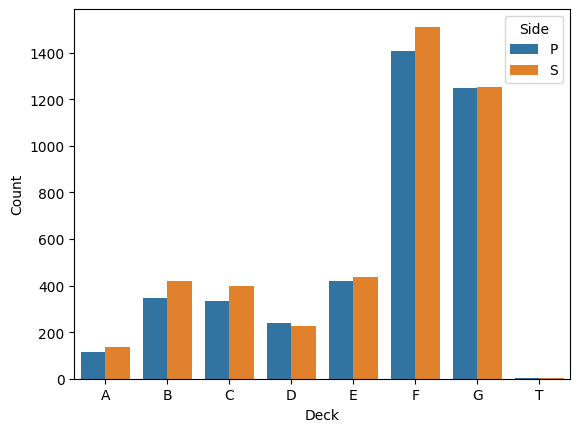

In [168]:
# group the data by Deck and Side and count the number of passengers in each group
grouped = df_train.groupby(['Deck', 'Side']).size().reset_index(name='Count')

# plot a bar plot to visualize the number of passengers by Deck and Side
sns.barplot(x='Deck', y='Count', hue='Side', data=grouped)
plt.show()


The below worldcloud depicts the Last Names of the passengers on the spaceship. The largest names are the ones where many people who are related came onto the spaceship.

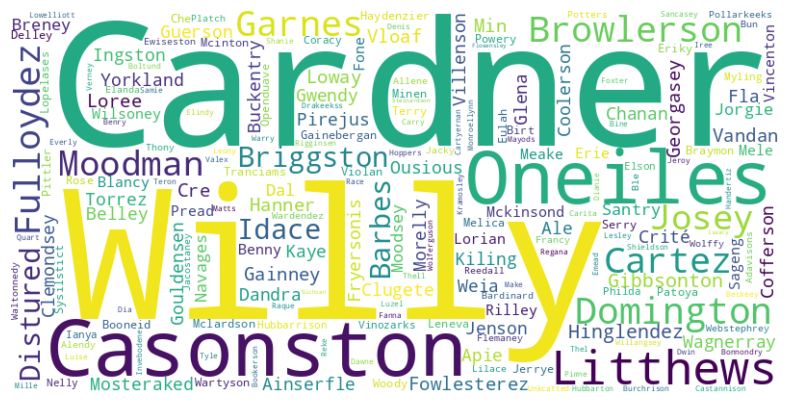

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# concatenate all the names into a single string
names = ' '.join(df_train['Name'].tolist())

# create a word cloud from the names string
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(names)

# plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Here, we split the first name and last name in the test and train dataset. Then we group them whether they were transported successfully or not. 

In [170]:
# extract the last name of each passenger
df_train['FirstName'] = df_train['Name'].str.split(' ').str[0]
df_train['LastName'] = df_train['Name'].str.split(' ').str[1]
# extract the last name of each passenger
df_test['FirstName'] = df_test['Name'].str.split(' ').str[0]
df_test['LastName'] = df_test['Name'].str.split(' ').str[1]


# group the data by LastName and calculate the number of survivors and non-survivors in each group
grouped = df_train.groupby('LastName').agg({'Transported': ['sum', 'count']})

# calculate the survival rate for each group
grouped['SurvivalRate'] = grouped['Transported']['sum'] / grouped['Transported']['count']

# sort the grouped data by SurvivalRate in descending order
grouped = grouped.sort_values(by=('SurvivalRate', ''), ascending=False)

So, these are the top 7 Last Names who has large families on the spaceship. Hence, we picked them and performed the survival rate analysis for the whole families.

In [171]:
## check the survival rate for Cardner, willy, casonston, oneiless, Garnes, Domington, Litthews
# filter the grouped data for Cardner
cardner = grouped.loc[grouped.index == 'Cardner', :]
print("Survival Rate for Cardner:", cardner['SurvivalRate'].values[0])

# filter the grouped data for Willy
willy = grouped.loc[grouped.index == 'Willy', :]
print("Survival Rate for Willy:", willy['SurvivalRate'].values[0])

# filter the grouped data for Carsonston
casonston = grouped.loc[grouped.index == 'Casonston', :]
print("Survival Rate for Casonston:", casonston['SurvivalRate'].values[0])

# filter the grouped data for Oneiless
oneiles = grouped.loc[grouped.index == 'Oneiles', :]
print("Survival Rate for Oneiless:", oneiles['SurvivalRate'].values[0])

# filter the grouped data for Garnes
garnes = grouped.loc[grouped.index == 'Garnes', :]
print("Survival Rate for Garnes:", garnes['SurvivalRate'].values[0])

# filter the grouped data for Domington
domington = grouped.loc[grouped.index == 'Domington', :]
print("Survival Rate for Domington:", domington['SurvivalRate'].values[0])

# filter the grouped data for Litthews
litthews = grouped.loc[grouped.index == 'Litthews', :]
print("Survival Rate for Litthews:", litthews['SurvivalRate'].values[0])


Survival Rate for Cardner: 0.5
Survival Rate for Willy: 0.2727272727272727
Survival Rate for Casonston: 0.3888888888888889
Survival Rate for Oneiless: 0.375
Survival Rate for Garnes: 0.35714285714285715
Survival Rate for Domington: 0.9333333333333333
Survival Rate for Litthews: 0.26666666666666666


Here, we can see the survival rate of each of the big families. AS we can see, there is no clear determination of how the survival rate is determined for each family. But, we can see that the survival rate for the Domington family is ridiculously high. This may be because they are VIP travellers whose half family is in the CryoSleep.

## **Encoding**

Dropping PassengerID and Name from the data to used for encoding

In [172]:
df_test.drop("PassengerId", axis=1, inplace=True)
df_train.drop("PassengerId", axis=1, inplace=True)

In [173]:
df_test.drop("Name", axis=1, inplace=True)
df_train.drop("Name", axis=1, inplace=True)

Encoding the list of parameters-

HomePlanet, CryoSleep, Destination, VIo, Deck, and Side.

In [174]:
from sklearn.preprocessing import LabelEncoder

# Create a list of variables that need encoding
vars_to_encode = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Deck', 'Side']

# Create the LabelEncoder object
le = LabelEncoder()

# Fit and transform the variables
for var in vars_to_encode:
    df_train[var] = le.fit_transform(df_train[var])
    df_test[var] = le.fit_transform(df_test[var])

In [175]:
df_train.drop(['FirstName', 'LastName'], axis=1, inplace=True)
df_test.drop(['FirstName', 'LastName'], axis=1, inplace=True)

In [176]:
df_train['Num']= df_train['Num'].astype('int')
df_test['Num']= df_train['Num'].astype('int')

In [177]:
df_train.dtypes

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck              int64
Num               int64
Side              int64
dtype: object

In [178]:
df_test.dtypes

HomePlanet        int64
CryoSleep         int64
Destination       int64
Age             float64
VIP               int64
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Transported       int64
Deck              int64
Num             float64
Side              int64
dtype: object

In [179]:
df_train.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,1,0,2,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
1,0,0,2,24.0,0,109.0,9.0,25.0,549.0,44.0,1,5,0,1
2,1,0,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,0,0,1
3,1,0,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,0,0,1
4,0,0,2,16.0,0,303.0,70.0,151.0,565.0,2.0,1,5,1,1


In [180]:
df_test.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Num,Side
0,0,1,2,27.0,0,0.0,0.0,0.0,0.0,0.0,0,6,0.0,1
1,0,0,2,19.0,0,0.0,9.0,0.0,2823.0,0.0,0,5,0.0,1
2,1,1,0,31.0,0,0.0,0.0,0.0,0.0,0.0,0,2,0.0,1
3,1,0,2,38.0,0,0.0,6652.0,0.0,181.0,585.0,0,2,0.0,1
4,0,0,2,20.0,0,10.0,0.0,635.0,0.0,0.0,0,5,1.0,1


# **Prediction**

So, after cleaning and EDA, we come to the prediction part, where the cleaned data is used to make necessary prediction or classifications. This is done to determine the accuracy with which the data can predict or classify correctly. This is an iterative process where we tend to increase the accuracy as we go and to build an efficient model.

First, clearing the null values from the Num column in the test dataframe.

In [184]:
df_test['Num'].fillna(df_test['Num'].mode()[0], inplace=True)

1. Building a Logistic Regression model first.

In [198]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the train data into X_train and y_train
X_train = df_train.drop(columns=["Transported"]) # drop the target variable
y_train = df_train["Transported"]

# Train the logistic regression model on X_train and y_train
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the target variable using the test data
X_test = df_test.drop(columns=["Transported"])
y_test = df_test["Transported"]
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4673679177623715


From this Logistic Regression model, we can see that the accuracy is very low. This is because just plain old Logistic Regression is not good enough to classify the data.

2. Next, we will classify using Decision Tree and Random Forest Classifier

In [186]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree Classifier:", dt_acc)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest Classifier:", rf_acc)


Accuracy of Decision Tree Classifier: 0.4989242170690892
Accuracy of Random Forest Classifier: 0.5414774085584508


Here, we can see that both the models performed a little better than Logistic regression, though not by much. Random Forest Classifier is performing a little better than other classifiers.

3. Naive Bayes


Now, we use Naive bayes algortihm on the X_train and y_train.

In [187]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes:", accuracy_nb)

Accuracy of Naive Bayes: 0.272053550083672


We can see that Naive Bayes just performs plain bad and is not a good match for this dataset.

4. K Nearest Neighbors**

Then, we use KNN to classify the dataset.

In [188]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 0.485297633277552


The accuracy of KNN is very low and we can conclude that nearest neighbors algorithm is also not a good fit for the data. This shows that there is very little correlation between most of the variables and the target variable.


5. Neural Networks

As we come into Deep Learning, we use the MLP classifier to classify the data.

In [189]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, random_state=0)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy of Neural Networks:", accuracy_nn)


Accuracy of Neural Networks: 0.5199617499402343


We can see that this model too does not perform as well as expected. 

6. Gradient Boosting

Next, we did Gradient Boosting on the same data to find out whether it works well or not.

In [190]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)


Accuracy of Gradient Boosting: 0.47023667224480037


Here, we can see that even Gradien Boosting algorithm is not a good match for the data.

So now, we changed the target variable from Transported to CryoSleep. This is to predict whether a person would be put in CryoSleep based on the factors in the dataset. And we got some interesting results.

## **Predicting if a passenger will be put into cryosleep based on their personal records**



We did the Logistic Regression again using the CryoSleep as target variable.





In [199]:

# Split the train data into X_train and y_train
X_train = df_train.drop(columns=["CryoSleep"]) # drop the target variable
y_train = df_train["CryoSleep"]

# Train the logistic regression model on X_train and y_train
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predict the target variable using the test data
X_test = df_test.drop(columns=["CryoSleep"])
y_test = df_test["CryoSleep"]
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9344967726512072


This is a terrific accuracy which shows that we can actually determine if a person is put in CryoSleep or not based on the various factors.

So, we recreate all the models we have done before using CryoSleep as a target variable and we got pretty good results compared to when we used Transported as target variable.




In [192]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Decision Tree Classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
print("Accuracy of Decision Tree Classifier:", dt_acc)

# Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
print("Accuracy of Random Forest Classifier:", rf_acc)


Accuracy of Decision Tree Classifier: 0.8685154195553431
Accuracy of Random Forest Classifier: 0.887879512311738


The Decision Tree Classifier algorithm performs pretty well with CryoSleep as a target varaible. This shows the increased correlation between CryoSleep
All the other variables in the dataset. 

Now we use Naive Bayes algorithm with CryoSleep as a target variable

In [193]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_nb = gnb.predict(X_test)
# Naive Bayes
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Accuracy of Naive Bayes:", accuracy_nb)

Accuracy of Naive Bayes: 0.9390389672483863


Here we can see that Naive bayes perform terrifically well with an accuracy score of 93.90%. 


In [194]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy of KNN:", accuracy_knn)

Accuracy of KNN: 0.9309108295481712


Now we have used KNN model to check if we get better performance, but KNN performs little less than Naive bayes but much better than Decision tree and Random forest Classifier with 93.09% of accuracy. 

In [195]:
from sklearn.neural_network import MLPClassifier
nn = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=1000, random_state=0)
nn.fit(X_train, y_train)
y_pred_nn = nn.predict(X_test)
accuracy_nn = accuracy_score(y_test, y_pred_nn)
print("Accuracy of Neural Networks:", accuracy_nn)


Accuracy of Neural Networks: 0.9380827157542434


Next, we have used Neural Networks model with MLP classifier algorithm to check the accuracy and we can see that it performs same as Naive Bayes with 93.80% of accuracy.

In [196]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, random_state=0)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Accuracy of Gradient Boosting:", accuracy_gb)

Accuracy of Gradient Boosting: 0.9304327038010997


At last we have used gradient boosting classifier algorithm to classify using CryoSleep as a target variable. Almost all the algorithms performs well with the change in the target variable.

# **Conclusion**

1. The initial attempt at prediction using Logistic Regression with
"Transported" as the target variable produced low accuracy.

2. However, changing the target variable to "CryoSleep" resulted in improved accuracy for various algorithms such as Logistic Regression, Decision Tree Classifier, Naive Bayes, KNN, Neural Networks, and Gradient Boosting Classifier.

3. Naive Bayes performed the best among all the algorithms with an accuracy score of 93.90%.

4. KNN also performed well with 93.09% accuracy, while MLP Classifier (Neural Networks) had 93.80% accuracy.

5. The accuracy of the models improved significantly with the change in the target variable from "Transported" to "CryoSleep".

6. The results suggest that it is possible to predict whether a person would be put in CryoSleep or not based on their personal records.

7. The improved accuracy of the models with "CryoSleep" as the target variable suggests a stronger correlation between the target variable and the other variables in the dataset.

8. In conclusion, the results from this analysis provide valuable insights into the relationship between various factors and the likelihood of being put in CryoSleep, making it possible to make accurate predictions.